# Support Vector Machines (SVM)

In [258]:
import warnings
warnings.filterwarnings("ignore")

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import datasets
from sklearn import svm

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


In [260]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [261]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [262]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [263]:
species_to_num = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [264]:
C = 1.0
clf = svm.SVC(kernel = 'linear', C=C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [265]:
clf.predict([[6,2]])

array([2], dtype=int64)

In [266]:
Xv = X.values.reshape(-1,1)
h=0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

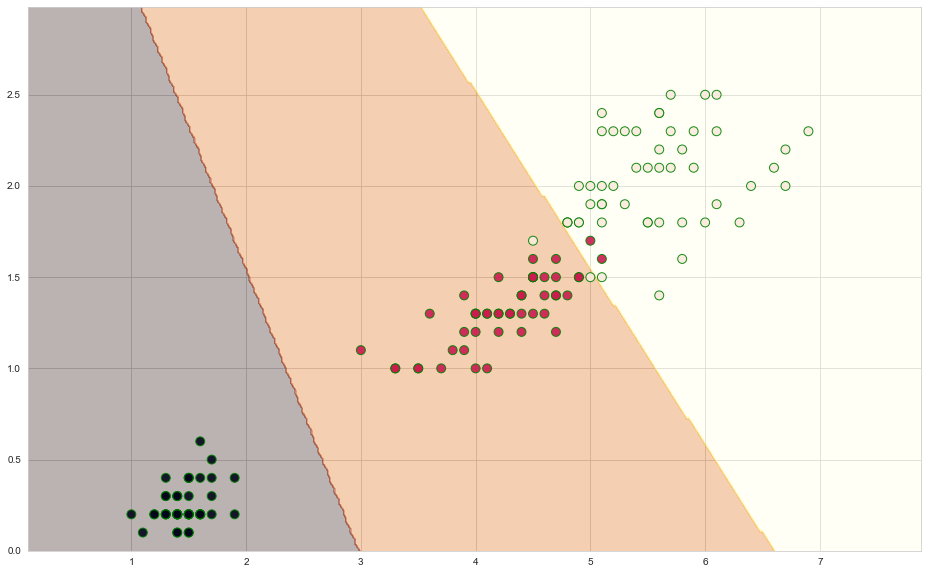

In [267]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha = 0.3)
plt.scatter(X.values[:, 0], X.values[:,1], c=y, s=80, alpha = 0.9, edgecolors = 'g')

## Linear SVM Implementation

In [268]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 0)

***Scale Features***

In [269]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [270]:
C = 1.0
clf = svm.SVC(kernel = 'linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [271]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### Cross Validation within Train Dataset

In [272]:
res = cross_val_score(clf, X_std_train, y_train, cv=10,scoring = 'accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [273]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [274]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [275]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_train, y_train_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_train, y_train_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision Score: 	 0.9500
Recall Score: 	 0.9500
F1 Score: 	 0.9500


### Cross Validation within Test Dataset

In [276]:
y_test_pred = cross_val_predict(clf, sc_x.fit_transform(X_test), y_test, cv=3)

In [277]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [278]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_test, y_test_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.9422
Recall Score: 	 0.9333
F1 Score: 	 0.9290


# Polynomial Kernel

In [279]:
C = 1.0
clf = svm.SVC(kernel='poly', degree = 3, C=C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [280]:
Xv = X.values.reshape(-1,1)
h=0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

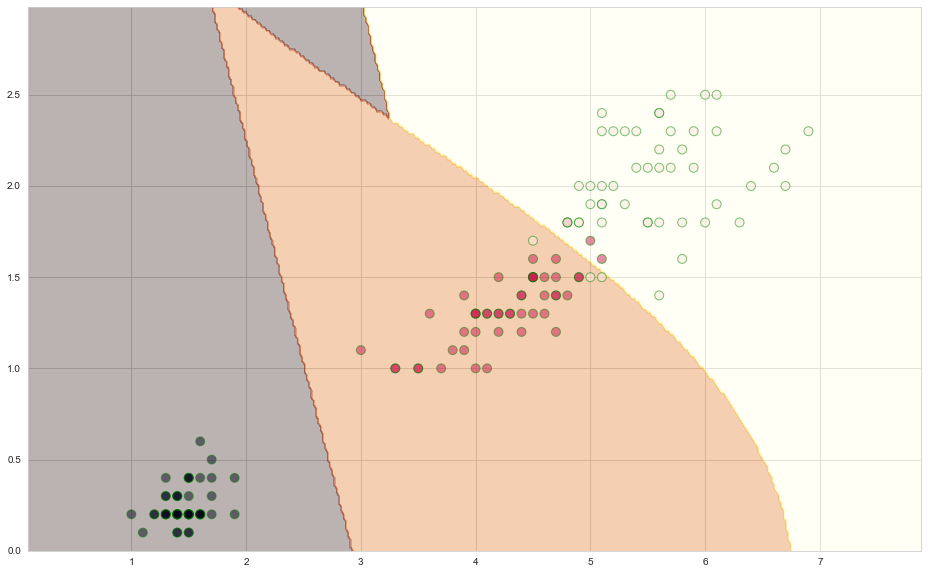

In [281]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx,yy,z,cmap='afmhot', alpha = 0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha = 0.5, edgecolors='g')

# Polynomial SVM Implementation

In [282]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:,col]
species_to_num = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state = 0)

### Scale features

In [283]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [284]:
C = 1.0
clf = svm.SVC(kernel = 'poly', degree = 3, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Cross Validation within Train Dataset

In [285]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring = 'accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

Average Accuracy: 	 0.9524
Accuracy SD: 		 0.0712


In [286]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [287]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [288]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_train, y_train_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_train, y_train_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision Score: 	 0.9570
Recall Score: 	 0.9500
F1 Score: 	 0.9500


### Cross Validation within Test Dataset

In [289]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [290]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3,  3]], dtype=int64)

In [291]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_test, y_test_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.9187
Recall Score: 	 0.9000
F1 Score: 	 0.8885


In [292]:
C = 1.0
clf = svm.SVC(kernel = 'poly', degree = 5, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [293]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring = 'accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

Average Accuracy: 	 0.9371
Accuracy SD: 		 0.0900


In [294]:

y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [295]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0, 10, 34]], dtype=int64)

In [296]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_test, y_test_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.9187
Recall Score: 	 0.9000
F1 Score: 	 0.8885


In [297]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [298]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  4,  2]], dtype=int64)

In [299]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_test, y_test_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.8980
Recall Score: 	 0.8667
F1 Score: 	 0.8422


In [300]:
C = 0.01
clf = svm.SVC(kernel = 'poly', degree = 5, C=C)
clf.fit(X_std_train, y_train)
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring = 'accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
print('Precision Score: \t {0:.4f}'.format(precision_score(y_train, y_train_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_train, y_train_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_train, y_train_pred, average = 'weighted')))
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_test, y_test_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))

Average Accuracy: 	 0.7985
Accuracy SD: 		 0.1327
Precision Score: 	 0.7547
Recall Score: 	 0.7417
F1 Score: 	 0.7463
Precision Score: 	 0.5833
Recall Score: 	 0.5667
F1 Score: 	 0.4844


# Gaussian Radial Basis Function (rbf)

In [301]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:,col]
species_to_num = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state = 0)

### Scale Features

In [302]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [303]:
C = 1.0
clf = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Cross Validation within Train Dataset

In [304]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring = 'accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [305]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [306]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [307]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_train, y_train_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_train, y_train_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision Score: 	 0.9586
Recall Score: 	 0.9583
F1 Score: 	 0.9584


### Grid Search

In [308]:
from sklearn.pipeline import Pipeline

In [309]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [310]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma = 0.1))])

In [311]:
params = {'clf__C':(0.1,0.5,1,2,5,10,20), 'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [312]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=1, cv=3, verbose=1, scoring='accuracy')

In [313]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy',

In [314]:
svm_grid_rbf.best_score_

0.9583333333333334

In [315]:
best = svm_grid_rbf.best_estimator_.get_params()

In [316]:
for k in sorted(params.keys()):
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 0.10
	clf__gamma: 	 0.25


In [317]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [318]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [319]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_test, y_test_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 1.0000
Recall Score: 	 1.0000
F1 Score: 	 1.0000


In [320]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state = 0)

In [321]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [322]:
C = 1.0
clf = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [323]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma = 0.1))])

In [324]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=1, cv=3, verbose=1, scoring='accuracy')

In [325]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy',

In [326]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [327]:
confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 18]], dtype=int64)

In [328]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average = 'weighted')))
print('Recall Score: \t {0:.4f}'.format(recall_score(y_test, y_test_pred, average = 'weighted')))
print('F1 Score: \t {0:.4f}'.format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.9356
Recall Score: 	 0.9333
F1 Score: 	 0.9331


# Support Vector Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target
X = df[['LSTAT']].values

In [5]:
svr = SVR()
svr.fit(X,y)

C:\Users\Drake\Anaconda3\envs\SVM\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

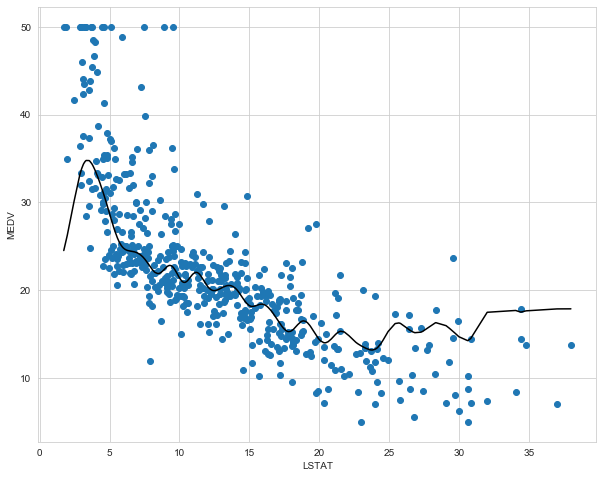

In [7]:
plt.figure(figsize = (10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color = 'k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

Linear Kernel

In [11]:
svr = SVR(kernel = 'linear')

In [12]:
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
y_train_pred = svr.predict(X_train)

In [14]:
y_test_pred = svr.predict(X_test)

In [19]:
print('MSE train {0:.4f}, test: {1:.4f}'.\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train 41.8187, test: 36.8372


In [20]:
print('R^2 train {0:.4f}, test: {1:.4f}'.\
      format(r2_score(y_train, y_train_pred), 
             r2_score(y_test, y_test_pred)))

R^2 train 0.5242, test: 0.5056


Polynomial

In [22]:
svr = SVR(kernel='poly', C=1e3, degree = 2)
svr.fit(X_train, y_train)

C:\Users\Drake\Anaconda3\envs\SVM\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [25]:
print('MSE train {0:.4f}, test: {1:.4f}'.\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print('R^2 train {0:.4f}, test: {1:.4f}'.\
      format(r2_score(y_train, y_train_pred), 
             r2_score(y_test, y_test_pred)))

MSE train 110.3334, test: 114.3676
R^2 train -0.2553, test: -0.5349


RBF

In [26]:
svr = SVR(kernel = 'rbf', C=1e3, gamma = 0.1)
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [28]:
print('MSE train {0:.4f}, test: {1:.4f}'.\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print('R^2 train {0:.4f}, test: {1:.4f}'.\
      format(r2_score(y_train, y_train_pred), 
             r2_score(y_test, y_test_pred)))

MSE train 27.5635, test: 26.7051
R^2 train 0.6864, test: 0.6416


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [31]:
svr = SVR(kernel = 'rbf', C=1e3, gamma = 0.1)
svr.fit(X_std_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [32]:
print('MSE train {0:.4f}, test: {1:.4f}'.\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print('R^2 train {0:.4f}, test: {1:.4f}'.\
      format(r2_score(y_train, y_train_pred), 
             r2_score(y_test, y_test_pred)))

MSE train 1285.0819, test: 1327.0269
R^2 train -13.6204, test: -16.8093
